In [1]:
import pandas as pd

data=pd.read_csv("sales_analysis.csv")
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [3]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'], errors='coerce')
data['Price Each'] = pd.to_numeric(data['Price Each'], errors='coerce')
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data.info()

/var/folders/r0/dqhy5bs54111m22ddrzpm1dc0000gn/T/ipykernel_7748/3672084152.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 8.6+ MB


In [4]:
data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address    545
dtype: int64

In [5]:
df=data.dropna()
print(df.isna().sum())
print(df.shape)

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64
(185950, 6)


In [6]:
df["Total Price"]=df["Quantity Ordered"] * df["Price Each"]
df.reset_index(drop=True, inplace=True)
df

/var/folders/r0/dqhy5bs54111m22ddrzpm1dc0000gn/T/ipykernel_7748/3182533028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Price"]=df["Quantity Ordered"] * df["Price Each"]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97
185946,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00
185947,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00
185948,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99


In [19]:

s = df['Purchase Address'].str.split(',', n=2, expand=True)
s=pd.DataFrame(s)
s

,0,1,2
0,917 1st St,Dallas,TX 75001
1,682 Chestnut St,Boston,MA 02215
2,669 Spruce St,Los Angeles,CA 90001
3,669 Spruce St,Los Angeles,CA 90001
4,333 8th St,Los Angeles,CA 90001
...,...,...,...
185945,840 Highland St,Los Angeles,CA 90001
185946,216 Dogwood St,San Francisco,CA 94016
185947,220 12th St,San Francisco,CA 94016
185948,511 Forest St,San Francisco,CA 94016


In [20]:
df["Street"]=s[0]
df["City"]=s[1]
df["State"]=s[2]
df['Month Name'] = df['Order Date'].dt.month_name()
df['Month'] = df['Order Date'].dt.month

df

/var/folders/r0/dqhy5bs54111m22ddrzpm1dc0000gn/T/ipykernel_7748/1244459284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Street"]=s[0]
/var/folders/r0/dqhy5bs54111m22ddrzpm1dc0000gn/T/ipykernel_7748/1244459284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["City"]=s[1]
/var/folders/r0/dqhy5bs54111m22ddrzpm1dc0000gn/T/ipykernel_7748/1244459284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Street,City,State,Month Name,Month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,917 1st St,Dallas,TX 75001,April,4
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,682 Chestnut St,Boston,MA 02215,April,4
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,669 Spruce St,Los Angeles,CA 90001,April,4
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,669 Spruce St,Los Angeles,CA 90001,April,4
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,333 8th St,Los Angeles,CA 90001,April,4
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,840 Highland St,Los Angeles,CA 90001,September,9
185946,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,216 Dogwood St,San Francisco,CA 94016,September,9
185947,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,220 12th St,San Francisco,CA 94016,September,9
185948,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,511 Forest St,San Francisco,CA 94016,September,9


In [21]:
df1=df.drop(['Product','Order Date','Purchase Address'],axis=1,inplace=False)
df1=df1.sort_values(by="Month")
df1=df1.reset_index()
df1

,index,Order ID,Quantity Ordered,Price Each,Total Price,Street,City,State,Month Name,Month
0,69061,142996,1.0,2.99,2.99,402 Chestnut St,Boston,MA 02215,January,1
1,70432,144300,1.0,150.00,150.00,532 River St,San Francisco,CA 94016,January,1
2,70431,144299,1.0,389.99,389.99,942 North St,San Francisco,CA 94016,January,1
3,70430,144298,1.0,14.95,14.95,709 North St,Los Angeles,CA 90001,January,1
4,70429,144297,1.0,300.00,300.00,437 Madison St,Atlanta,GA 30301,January,1
...,...,...,...,...,...,...,...,...,...,...
185945,46931,311693,1.0,149.99,149.99,594 9th St,Dallas,TX 75001,December,12
185946,46932,311694,1.0,2.99,2.99,905 11th St,Atlanta,GA 30301,December,12
185947,46933,311695,1.0,11.99,11.99,107 Lakeview St,San Francisco,CA 94016,December,12
185948,46911,311673,1.0,11.95,11.95,169 Forest St,San Francisco,CA 94016,December,12


In [22]:

fdf=df1.groupby(df1["Month Name"],sort=False)["Total Price"].sum()
fdf= fdf.reset_index()
fdf

,Month Name,Total Price
0,January,1822256.73
1,February,2202022.42
2,March,2807100.38
3,April,3390670.24
4,May,3152606.75
5,June,2577802.26
6,July,2647775.76
7,August,2244467.88
8,September,2097560.13
9,October,3736726.88


In [23]:
max=fdf["Total Price"].max()
max_month=fdf[fdf["Total Price"]==max]
max_month

,Month Name,Total Price
11,December,4613443.34


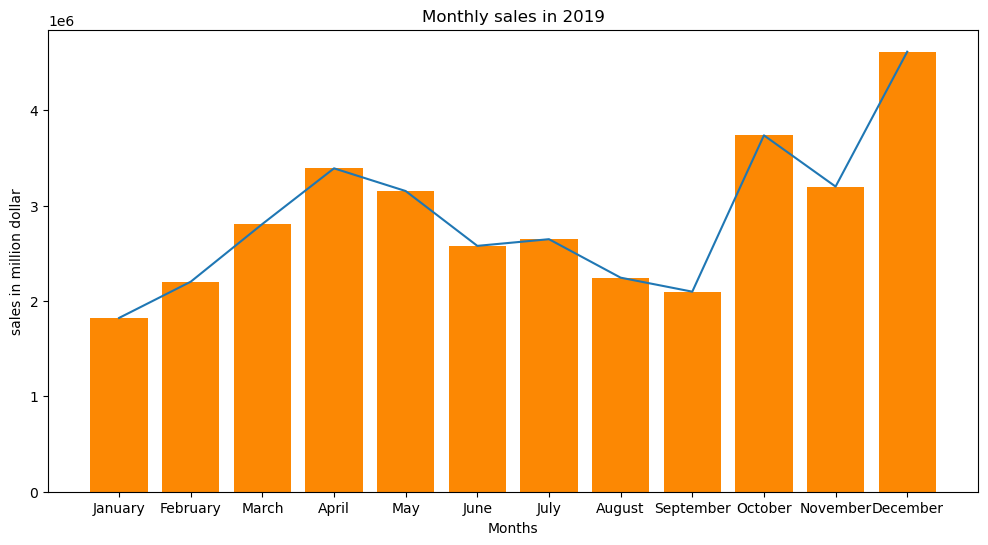

In [24]:
import matplotlib.pyplot as plt

month = fdf["Month Name"]
values = fdf["Total Price"]
fig,ax = plt.subplots(figsize=(12,6), constrained_layout=False)
plt.bar(month, values,color='#fc8803')
plt.plot(month, values)
plt.xlabel('Months')
plt.ylabel('sales in million dollar')
plt.title('Monthly sales in 2019')
plt.show()
